In [1]:
import eLSH
import KDE
import numpy as np
import mr_hbe as mr
#%%  Problem Specifications


# generate (n,k,d,s)-Instance
kernel = lambda x: np.exp(-x)
inverse = lambda mu: -np.log(mu)
num_points = 100
clusters = 5
scales = 3
density = 0.005
dimension = 10
spread = 0.02
Instance = KDE.KDE_Instance(kernel,  inverse, num_points, density, 
                 clusters, dimension, scales, spread)
n = Instance.N
print(n)
eps = 0.5 # multiplicative accuracy of estimation

530


6.069708517540586
[2, 5, 7, 7, 10, 12, 12]
[3.1915382432114616, 7.978845608028655, 11.170383851240116, 11.170383851240116, 15.95769121605731, 19.14922945926877, 19.14922945926877]
1
Initialization finished


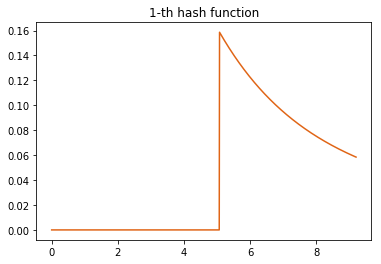

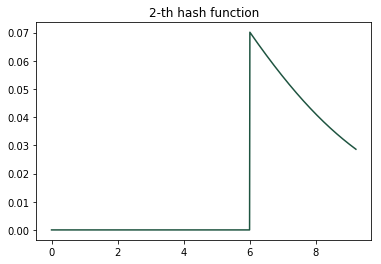

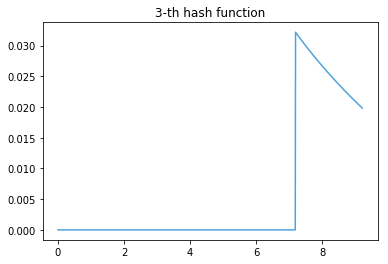

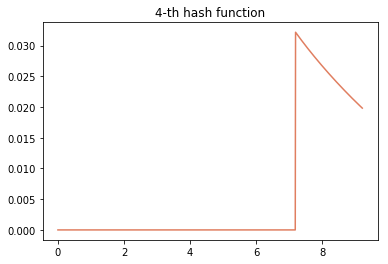

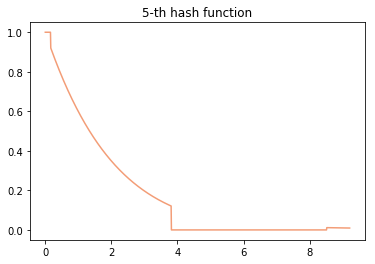

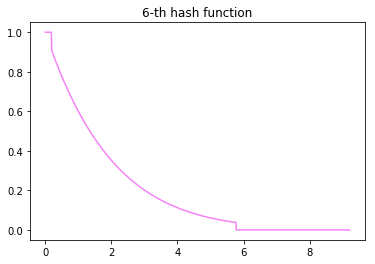

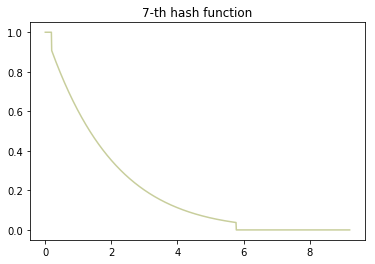

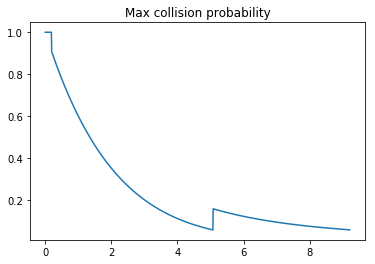

In [6]:
#%% Multi-resolution HBE
tau = float(10**-4) # minimum density that we wish to be able to approximate 
R = 2*np.sqrt(np.log(1.0/tau))
print(R)
mr_exp = mr.MR_Exp(tau, Instance.X, R, 0.54, 0.5)
mr_exp.plot_probabilites()

In [ ]:
#%% Unit Test for (n,k,d,s)-Instance
print "================================"
print "Unit Test for random queries"
print "================================"
print "Required relative error < {:.3f}".format(eps) 
print "--------------------------------"

iterations = 20
cnt = 0
for j in range(iterations):
    q = np.zeros(Instance.dimension) + np.random.randn(dimension) / np.sqrt(dimension)
    kernel = lambda x,y: np.exp(-np.linalg.norm(x-y))
    
    kde = 0.0
    for i in range(n):
        kde = kde + kernel(q, Instance.X[:,i])
    kde = kde / n
    est = mr_exp.AMR(q) 
    print est
    if abs((kde - est) / kde) <= eps:
        cnt = cnt + 1
    print "Query {} rel-error: {:.3f}".format(j+1,(kde - est) / kde)

print "--------------------------------"
print "Failure prob: {:.2f}".format(1 - cnt / float(iterations))
print "================================"
